<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-4df13306bf58>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
print('Task 1.1 - Display the first 5 rows of the dataset')
print(boston_df.head(5))

Task 1.1 - Display the first 5 rows of the dataset
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


In [7]:
print('Task 1.2 - Display the data types of each column.')
print(boston_df.dtypes)

Task 1.2 - Display the data types of each column.
Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object


In [8]:
print('Task 1.3 - Check for missing values in each column.')
print(boston_df.isnull().sum())

Task 1.3 - Check for missing values in each column.
Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64


In [9]:
print('Task 1.4 - Check for duplicate rows.')
print(boston_df.duplicated().sum())

Task 1.4 - Check for duplicate rows.
0


In [10]:
print('Task 1.5 - Display the correlation matrix of the dataset.')
correlation_matrix = boston_df.corr()
print(correlation_matrix)

Task 1.5 - Display the correlation matrix of the dataset.
            Unnamed: 0      CRIM        ZN     INDUS      CHAS       NOX  \
Unnamed: 0    1.000000  0.407407 -0.103393  0.399439 -0.003759  0.398736   
CRIM          0.407407  1.000000 -0.200469  0.406583 -0.055892  0.420972   
ZN           -0.103393 -0.200469  1.000000 -0.533828 -0.042697 -0.516604   
INDUS         0.399439  0.406583 -0.533828  1.000000  0.062938  0.763651   
CHAS         -0.003759 -0.055892 -0.042697  0.062938  1.000000  0.091203   
NOX           0.398736  0.420972 -0.516604  0.763651  0.091203  1.000000   
RM           -0.079971 -0.219247  0.311991 -0.391676  0.091251 -0.302188   
AGE           0.203784  0.352734 -0.569537  0.644779  0.086518  0.731470   
DIS          -0.302211 -0.379670  0.664408 -0.708027 -0.099176 -0.769230   
RAD           0.686002  0.625505 -0.311948  0.595129 -0.007368  0.611441   
TAX           0.666626  0.582764 -0.314563  0.720760 -0.035587  0.668023   
PTRATIO       0.291074  0.2899

In [11]:
print('Task 2.1 - Display descriptive statistics of the dataset.')
print(boston_df.describe())

Task 2.1 - Display descriptive statistics of the dataset.
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549

Task 2.2 - Create a boxplot for MEDV (Median value of owner-occupied homes).


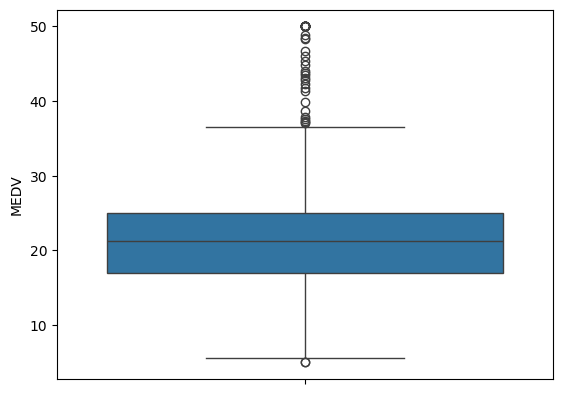

In [12]:
print('Task 2.2 - Create a boxplot for MEDV (Median value of owner-occupied homes).')
bp = sns.boxplot(y='MEDV', data=boston_df)
pyplot.show()

Task 2.3 - Create a bar plot for CHAS (Charles River dummy variable).


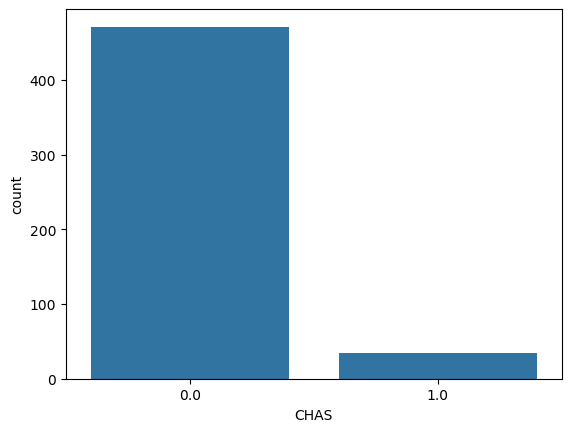

In [13]:
print('Task 2.3 - Create a bar plot for CHAS (Charles River dummy variable).')
ax = sns.countplot(x='CHAS', data=boston_df)
pyplot.show()

Task 2.4 - Discretize AGE into three groups and create a boxplot of MEDV versus these groups:


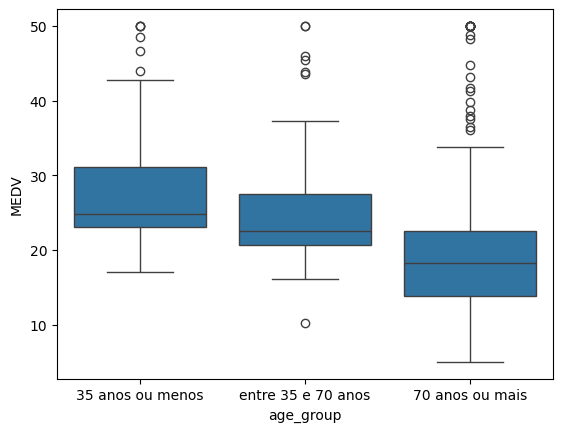

In [14]:
print('Task 2.4 - Discretize AGE into three groups and create a boxplot of MEDV versus these groups:')

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 anos ou menos'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'entre 35 e 70 anos'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 anos ou mais'

ag = sns.boxplot(x='age_group', y='MEDV', data=boston_df, 
            order=['35 anos ou menos', 'entre 35 e 70 anos', '70 anos ou mais'])
pyplot.show()

Task 2.5 - Create a scatter plot showing the relationship between NOX (nitric oxide concentrations) and INDUS (non-retail business acres).


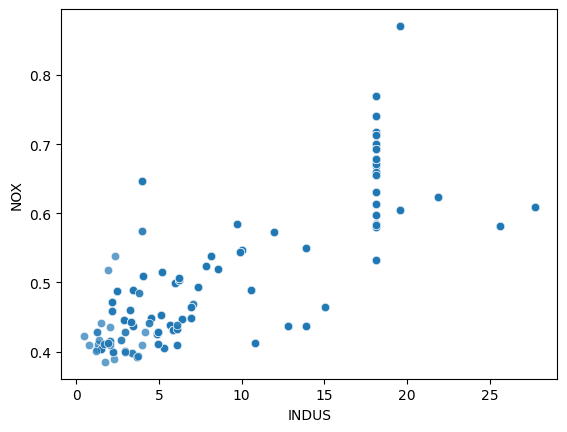

In [15]:
print('Task 2.5 - Create a scatter plot showing the relationship between NOX (nitric oxide concentrations) and INDUS (non-retail business acres).')
ni = sns.scatterplot(x='INDUS', y='NOX', data=boston_df, alpha=0.7)
pyplot.show()

Task 2.6 - Create a histogram for PTRATIO (pupil-teacher ratio).


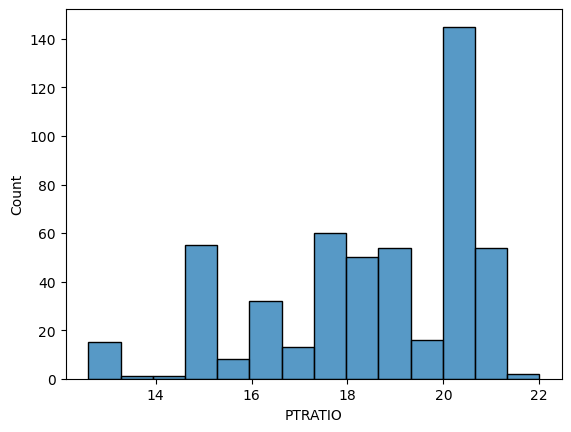

In [16]:
print('Task 2.6 - Create a histogram for PTRATIO (pupil-teacher ratio).')
pt = sns.histplot(boston_df['PTRATIO'])
pyplot.show()

In [17]:
print('Task 3.1 - Use Levene’s test to check if the variances of MEDV for homes bounded by the Charles River (CHAS = 1) and those not bounded (CHAS = 0) are equal.')
print(scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean'))

Task 3.1 - Use Levene’s test to check if the variances of MEDV for homes bounded by the Charles River (CHAS = 1) and those not bounded (CHAS = 0) are equal.
LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)


In [21]:
print('Task 3.2 - Perform a T-test to determine if there is a significant difference in MEDV between homes bounded and not bounded by the Charles River.')
print(scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var= True))

Task 3.2 - Perform a T-test to determine if there is a significant difference in MEDV between homes bounded and not bounded by the Charles River.
TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)


In [22]:
print('Task 3.3 - Conduct an ANOVA test to compare MEDV among the three AGE groups created earlier.')
low_age = boston_df[boston_df['age_group'] == '35 anos ou menos']['MEDV']
mid_age = boston_df[boston_df['age_group'] == 'entre 35 e 70 anos']['MEDV']
high_age = boston_df[boston_df['age_group'] == '70 anos ou mais']['MEDV']

print(scipy.stats.f_oneway(low_age, mid_age, high_age))


Task 3.3 - Conduct an ANOVA test to compare MEDV among the three AGE groups created earlier.
F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)


In [23]:
print('Task 3.4 - Perform a Pearson correlation test to assess the relationship between NOX and INDUS.')
print(scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX']))

Task 3.4 - Perform a Pearson correlation test to assess the relationship between NOX and INDUS.
PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)


In [24]:
print('Task 3.5 - Fit a simple linear regression model to evaluate the impact of DIS (distance to employment centres) on MEDV. Report and interpret the regression results.')

y = boston_df['MEDV']
X = sm.add_constant(boston_df['DIS']) # Adiciona o intercepto

model = sm.OLS(y, X).fit()
print(model.summary())

Task 3.5 - Fit a simple linear regression model to evaluate the impact of DIS (distance to employment centres) on MEDV. Report and interpret the regression results.
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 15 Feb 2026   Prob (F-statistic):           1.21e-08
Time:                        17:33:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t  